In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Loading the dataset

In [3]:
dataset = pd.read_csv('BlackFriday.csv')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


checking number of nulls in each columns

In [7]:
dataset.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

Instead of removing rows, we remove the columns with nulls then analyse dataset.

In [8]:
del dataset['Product_Category_2']
del dataset['Product_Category_3']

In [9]:
dataset.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

analysing columns

In [15]:
len(dataset['User_ID'].unique())

5891

In [65]:
dataset['User_ID'].value_counts().head(1)

User_ID
1001680    1025
Name: count, dtype: int64

In [24]:
len(dataset['Product_ID'].unique())

3623

In [28]:
dataset['Product_ID'].value_counts()

Product_ID
P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
             ... 
P00038642       1
P00169842       1
P00172642       1
P00295642       1
P00091742       1
Name: count, Length: 3623, dtype: int64

In [29]:
dataset['Gender'].value_counts()

Gender
M    405380
F    132197
Name: count, dtype: int64

In [63]:
dataset['Age'].value_counts()

Age
26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: count, dtype: int64

In [31]:
dataset['Occupation'].value_counts()

Occupation
4     70862
0     68120
7     57806
1     45971
17    39090
20    32910
12    30423
14    26712
2     25845
16    24790
6     19822
3     17366
10    12623
5     11985
15    11812
11    11338
19     8352
13     7548
18     6525
9      6153
8      1524
Name: count, dtype: int64

In [32]:
dataset['City_Category'].value_counts()

City_Category
B    226493
C    166446
A    144638
Name: count, dtype: int64

In [33]:
dataset['Marital_Status'].value_counts()

Marital_Status
0    317817
1    219760
Name: count, dtype: int64

In [34]:
dataset['Product_Category_1'].value_counts()

Product_Category_1
5     148592
1     138353
8     112132
11     23960
2      23499
6      20164
3      19849
4      11567
16      9697
15      6203
13      5440
10      5032
12      3875
7       3668
18      3075
14      1500
17       567
9        404
Name: count, dtype: int64

In [36]:
dataset['Purchase'].mean()

np.float64(9333.859852635065)

In [37]:
dataset['Purchase'].median()

np.float64(8062.0)

In [38]:
dataset['Purchase'].mode()

0    6855
Name: Purchase, dtype: int64

Total value purchased by a user

In [55]:
dataset.groupby('User_ID')['Purchase'].sum().sort_values(ascending=False)

User_ID
1004277    10536783
1001680     8699232
1002909     7577505
1001941     6817493
1000424     6573609
             ...   
1004464       46091
1005944       46070
1005012       45551
1005117       44432
1004991       44108
Name: Purchase, Length: 5891, dtype: int64

Total 

In [57]:
dataset.groupby('User_ID')['Product_ID'].size().sort_values(ascending=False)

User_ID
1001680    1025
1004277     978
1001941     898
1001181     861
1000889     822
           ... 
1005810       6
1005608       6
1002111       6
1005391       6
1000708       5
Name: Product_ID, Length: 5891, dtype: int64

In [59]:
dataset.groupby('Product_ID')['Purchase'].sum().sort_values(ascending=False)

Product_ID
P00025442    27532426
P00110742    26382569
P00255842    24652442
P00184942    24060871
P00059442    23948299
               ...   
P00012942        1717
P00325342        1656
P00353042        1545
P00309042         726
P00091742         405
Name: Purchase, Length: 3623, dtype: int64

In [67]:
print(dataset['User_ID'].value_counts().mean())

91.25394669835342


In [68]:
dataset.groupby('Product_ID')['Purchase'].sum().sort_values(ascending=False).head(1)

Product_ID
P00025442    27532426
Name: Purchase, dtype: int64

In [75]:
(dataset['Product_ID'].value_counts() == 1).sum()

np.int64(141)

In [76]:
dataset.groupby('Gender')['Purchase'].mean()

Gender
F    8809.761349
M    9504.771713
Name: Purchase, dtype: float64

In [77]:
dataset.groupby('User_ID')['Purchase'].mean()

User_ID
1000001     9808.264706
1000002    10662.539474
1000003    11780.517241
1000004    15845.153846
1000005     7745.292453
               ...     
1006036     8028.710084
1006037     9267.560345
1006038     8085.900000
1006039     8276.179104
1006040     9246.242604
Name: Purchase, Length: 5891, dtype: float64

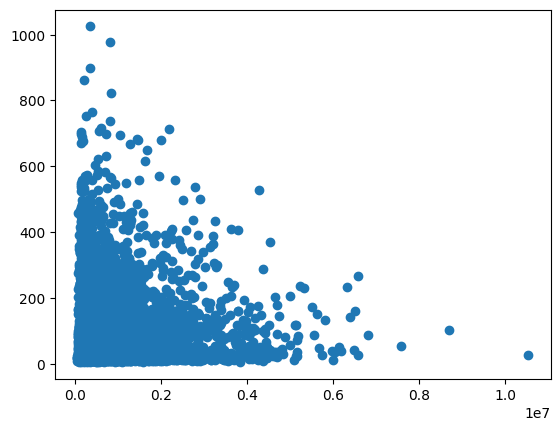

In [80]:
plt.scatter(dataset.groupby('User_ID')['Purchase'].sum(), dataset['User_ID'].value_counts())

In [5]:
dataset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [4]:
print(dataset['Purchase'].sum())

5017668378


<Axes: ylabel='Purchase'>

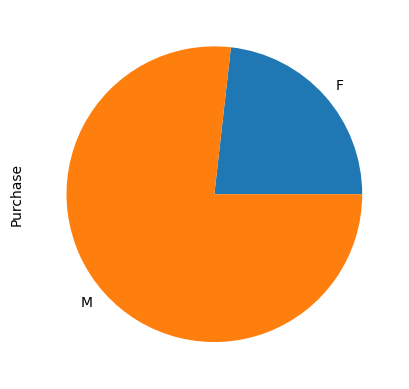

In [7]:
dataset.groupby('Gender')['Purchase'].sum().plot(kind='pie')

In [13]:
dataset['Age'].value_counts()

Age
26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: count, dtype: int64

Female Users living in City C in age 26-45 spending more than 5000?

In [ ]:
dataset[ (dataset['Gender'] == 'F') &
         (dataset['City_Category'] == 'C') & 
         (dataset['Purchase'] >5000) &
         ( (dataset['Age'] == '26-35') | (dataset['Age'] == '36-45') )] 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
47,1000011,P00192642,F,26-35,1,C,1,0,8,17.0,NaN,6171
48,1000011,P00110842,F,26-35,1,C,1,0,1,2.0,5.0,19327
49,1000011,P00189642,F,26-35,1,C,1,0,8,13.0,NaN,8027
65,1000016,P00244242,F,36-45,0,C,0,1,1,2.0,15.0,11755
66,1000016,P00217742,F,36-45,0,C,0,1,5,14.0,NaN,8702
...,...,...,...,...,...,...,...,...,...,...,...,...
537469,1004726,P00296042,F,36-45,16,C,2,1,8,13.0,16.0,7986
537471,1004726,P00034842,F,36-45,16,C,2,1,5,14.0,NaN,7177
537472,1004726,P00037142,F,36-45,16,C,2,1,1,2.0,5.0,11845
537473,1004726,P00058442,F,36-45,16,C,2,1,5,14.0,NaN,5155


: 